## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")
#merge_df.count()  #to check count of items in each row, appears no missing data.
merged_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [3]:
# Checking the number of mice in the DataFrame.
#num_mice = merge_df['Mouse ID'].value_counts()
num_mice = len(merged_df['Mouse ID'].unique())
num_mice



249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. Get all the data for the duplicate mouse ID. 

#here we see that there are more than one mouse with the same ID that also have a timepoint of 0, which means there must have been two mice with the same ID
#since there are 249 mice and we show 250 mice with a 0 value, then there must be two separate mouse that used the same ID
merged_df['Timepoint'].value_counts()

#with this line, we are looking at any lines that have the same mouse ID and timepoints. this helps us ID the mouse(mice) that may have used the same ID numbers
#adding the argument keep = false returns all of the duplicated rows. As we can see, it is Mouse ID g989 that is being duplicated.
dupes_df = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
dupes_df




Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset =['Mouse ID' , 'Timepoint'])
clean_df




Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1888 rows x 8 columns]

In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_df['Mouse ID'].unique())
num_mice





249

In [7]:
#checking the number of mice with timpoints of 0 (to verify only 249 mice have timepoints of 0)
clean_df['Timepoint'].value_counts()



0     249
5     237
10    222
15    206
20    194
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#method1: is the most straightforward, creating multiple series and putting them all together at the end.
#method2: This method produces everything in a single groupby function.

grouped_by_regimen_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])
grouped_by_regimen_df



#---------------Option 1----------------------
#group by regimen and then do the summary stats
#grouped_by_regimen_df = clean_df.groupby(['Drug Regimen'])

#tumor_mean = grouped_by_regimen_df['Tumor Volume (mm3)'].mean()
#tumor_median = grouped_by_regimen_df['Tumor Volume (mm3)'].median()
#tumor_variance = grouped_by_regimen_df['Tumor Volume (mm3)'].var()
#tumor_std = grouped_by_regimen_df['Tumor Volume (mm3)'].std()
#tumor_SEM = grouped_by_regimen_df['Tumor Volume (mm3)'].sem()

#create a new dataframe with the tumor's summary statistics
#tumor_summary_df = pd.DataFrame({"Tumor Volume Mean": tumor_mean, "Tumor Volume Median": tumor_median, 
                                 #"Tumor Volume Variance": tumor_variance, "Tumor Volume Std Dev": tumor_std, 
                                 #"Tumor Volume SEM": tumor_SEM})
#tumor_summary_df



mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

Text(0, 0.5, 'test')

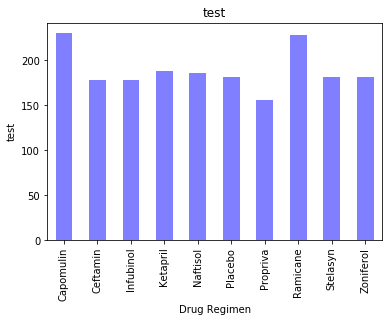

In [18]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#create a group based on values in drug regimen
grouped_by_regimen = clean_df.groupby(['Drug Regimen'])
#count how many mice are in each regimen group
mouse_count_by_regimen = grouped_by_regimen['Mouse ID'].count()

#create a bar chart based off of the group series from above
mouse_count_chart = mouse_count_by_regimen.plot(kind = 'bar', color='b', alpha = .5)

#set x and y labels
mouse_count_chart.set_title("test")
mouse_count_chart.set_xlabel("Drug Regimen")
mouse_count_chart.set_ylabel("test")

#mouse_count_by_regimen

#stacked bar
#test = clean_df.groupby(['Timepoint', 'Drug Regimen'])['Mouse ID'].count().unstack('Drug Regimen').fillna(0)
#test.plot(kind='bar', stacked=True)

#the sum of mice per point



Text(0, 0.5, 'test')

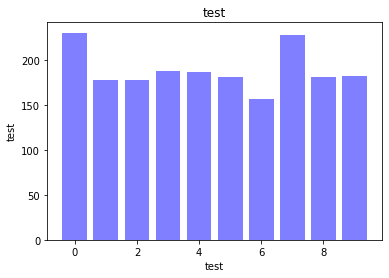

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(0,len(grouped_by_regimen['Drug Regimen']))

tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
plt.bar(x_axis, mouse_count_by_regimen, facecolor="blue", alpha = .5, align = "center")

plt.title("test")
plt.xlabel("test")
plt.ylabel("test")

#grouped_by_regimen(['Drug Regimen']) #need to somehow get regimens to show up as tickmarks
#plt.xticks(tick_locations, grouped_by_regimen['Drug Regimen'])

#plt.show()


## Pie Plots

In [1]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#drop any duplicate mouse IDs so we can get a unique count of mice by gender
non_dup_df = clean_df.drop_duplicates('Mouse ID')

#count number of mice by sex
mouse_count_by_sex = non_dup_df['Sex'].value_counts()

#create a bar chart based off of the group series from above
mouse_count_pie = mouse_count_by_sex.plot(kind = 'pie')

mouse_count_by_sex

NameError: name 'clean_df' is not defined

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Treatments: Capomulin, Ramicane, Infubinol, and Ceftamin.


#=======Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.======# 

#drop all duplicates of Mouse ID but keep the last row for each (which tells us last tumor size)
last_treatment_df = clean_df.drop_duplicates(['Mouse ID'], keep='last')

#keep only necessary columns and filter by the four treatments Capomulin, Ramicane, Infubinol, and Ceftamin.
regimen_df = last_treatment_df.loc[(last_treatment_df['Drug Regimen'] == "Ramicane") | (last_treatment_df['Drug Regimen'] == "Capomulin") | (last_treatment_df['Drug Regimen'] == "Infubinol")| (last_treatment_df['Drug Regimen'] == "Ceftamin")]

#making sure our data is sorted to determine outliers
sorted_regimen_df = regimen_df.sort_values(by=['Tumor Volume (mm3)'])

#=======Calculate the IQR and quantitatively determine if there are any potential outliers for each regimen======#

#----------Capomulin summary------------#
cap_df = sorted_regimen_df.loc[(sorted_regimen_df['Drug Regimen'] == "Capomulin")]
cap_tumor_size = cap_df['Tumor Volume (mm3)']
cap_quartiles = cap_tumor_size.quantile([.25,.5,.75])

cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-lowerq

print("CAPOMULIN SUMMARY:------------------")
print(f"The lower quartile of tumor volume is: {cap_lowerq}")
print(f"The upper quartile of tumor volume is: {cap_upperq}")
print(f"The interquartile range of tumor volume is: {cap_iqr}")
print(f"The the median of tumor volume is: {cap_quartiles[0.5]} ")

cap_lower_bound = cap_lowerq - (1.5*iqr)
cap_upper_bound = cap_upperq + (1.5*iqr)
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

#----------Ramicane Summary---------#

ram_df = sorted_regimen_df.loc[(sorted_regimen_df['Drug Regimen'] == "Ramicane")]
ram_tumor_size = ram_df['Tumor Volume (mm3)']
ram_quartiles = ram_tumor_size.quantile([.25,.5,.75])

ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-lowerq

print("")
print("RAMICANE SUMMARY:-------------------")
print(f"The lower quartile of tumor volume is: {ram_lowerq}")
print(f"The upper quartile of tumor volume is: {ram_upperq}")
print(f"The interquartile range of tumor volume is: {ram_iqr}")
print(f"The the median of tumor volume is: {ram_quartiles[0.5]} ")

ram_lower_bound = ram_lowerq - (1.5*iqr)
ram_upper_bound = ram_upperq + (1.5*iqr)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

#----------Infubinol Summary---------#

inf_df = sorted_regimen_df.loc[(sorted_regimen_df['Drug Regimen'] == "Infubinol")]
inf_tumor_size = inf_df['Tumor Volume (mm3)']
inf_quartiles = inf_tumor_size.quantile([.25,.5,.75])

inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-lowerq

print("")
print("INFUBINOL SUMMARY:-------------------")
print(f"The lower quartile of tumor volume is: {inf_lowerq}")
print(f"The upper quartile of tumor volume is: {inf_upperq}")
print(f"The interquartile range of tumor volume is: {inf_iqr}")
print(f"The the median of tumor volume is: {inf_quartiles[0.5]} ")

inf_lower_bound = inf_lowerq - (1.5*iqr)
inf_upper_bound = inf_upperq + (1.5*iqr)
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

#----------Ceftamin Summary---------#

cef_df = sorted_regimen_df.loc[(sorted_regimen_df['Drug Regimen'] == "Ceftamin")]
cef_tumor_size = cef_df['Tumor Volume (mm3)']
cef_quartiles = cef_tumor_size.quantile([.25,.5,.75])

cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-lowerq

print("")
print("CEFTAMIN SUMMARY:-------------------")
print(f"The lower quartile of tumor volume is: {cef_lowerq}")
print(f"The upper quartile of tumor volume is: {cef_upperq}")
print(f"The interquartile range of tumor volume is: {cef_iqr}")
print(f"The the median of tumor volume is: {cef_quartiles[0.5]} ")

cef_lower_bound = cef_lowerq - (1.5*iqr)
cef_upper_bound = cef_upperq + (1.5*iqr)
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")


NameError: name 'lowerq' is not defined

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#create dictionary to store regimen and their volume size data
regimen_dict = ({"Capomulin":cap_tumor_size, "Ramicane": ram_tumor_size, "Infubinol": inf_tumor_size, "Ceftamin": cef_tumor_size})

#set color and shape for outliers
red_diamond = dict(markerfacecolor = 'red', markersize = '10', marker='o')

#plot tumor volume for each Regimen
fig, ax1 = plt.subplots()
ax1.boxplot(regimen_dict.values(), flierprops = red_diamond)


#set title and tick labels
ax1.set_xticklabels(regimen_plots_df.keys())
ax1.set_title("Tumor Volume by Regimen")

#need to change color of outlier


plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin






In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df = clean_df.loc[(clean_df['Drug Regimen']=="Capomulin")]
cap_df

grouped_cap = cap_df.groupby(['Mouse ID'])
avg_weight = grouped_cap['Weight (g)'].mean()
avg_tumor_size = grouped_cap['Tumor Volume (mm3)'].mean()

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(avg_weight, avg_tumor_size)



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
